# kNN 手写数字分类

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 0


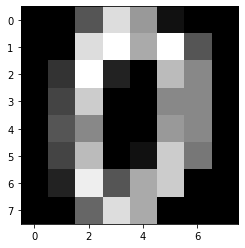

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from pylab import *
import pandas as pd

# 加载数据
digits = load_digits()
data = digits.data
print(data.shape)
print(digits.images[0], digits.target[0])
_ = imshow(digits.images[0], cmap='gray')

In [2]:
# 划分训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(data, digits.target, 
                                                      test_size=0.25, 
                                                      random_state=33)

# 标准化处理 100万，5    101万, 1   (X-u)/v
ss = preprocessing.StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_valid_norm = ss.transform(X_valid)

pd.DataFrame([X_train.mean(axis=0), 
              X_train.std(axis=0),
              X_train_norm.mean(axis=0), 
              X_train_norm.std(axis=0)]).T

,0,1,2,3
0,0.000000,0.000000,0.000000e+00,0.0
1,0.302153,0.924798,-1.234680e-16,1.0
2,5.148478,4.738155,-8.477093e-17,1.0
3,11.813660,4.241786,-4.742556e-16,1.0
4,11.867112,4.276384,2.029227e-16,1.0
...,...,...,...,...
59,12.058649,4.363611,1.365731e-16,1.0
60,11.743133,5.001791,-1.781962e-16,1.0
61,6.615442,5.930981,2.077032e-17,1.0
62,2.010393,4.044285,-2.823774e-16,1.0


In [3]:
# kNN
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_norm, y_train) 
print(knn.score(X_valid_norm, y_valid))

0.9755555555555555


In [4]:
# NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_valid, y_valid))

0.8311111111111111


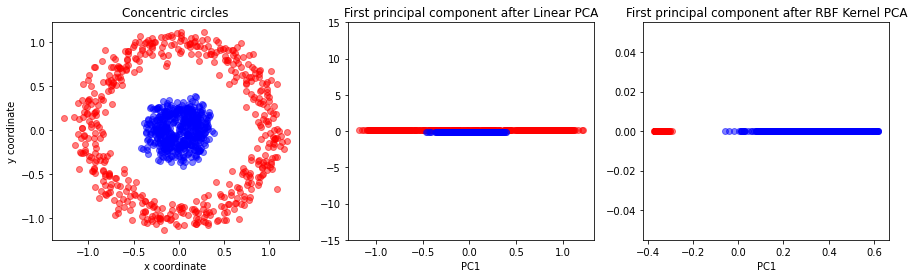

In [21]:
# PCA 和 K-PCA 的降维效果对比

from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

# 原始数据

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
axes[0].scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
axes[0].scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
axes[0].set_title('Concentric circles')
axes[0].set_ylabel('y coordinate')
axes[0].set_xlabel('x coordinate')

# 使用线性 PCA 降维

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

axes[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
axes[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
axes[1].set_ylim([-15,15])
# axes[1].text(-0.125, 12.5, 'gamma = 15', fontsize=12)
axes[1].set_title('First principal component after Linear PCA')
axes[1].set_xlabel('PC1')

# 使用 K-PCA 降维

scikit_kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = scikit_kpca.fit_transform(X)

axes[2].scatter(X_kpca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
axes[2].scatter(X_kpca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
# axes[2].text(-0.05, 0.007, 'gamma = 15', fontsize=12)
axes[2].set_title('First principal component after RBF Kernel PCA')
axes[2].set_xlabel('PC1')

plt.show()